Задача 1: Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

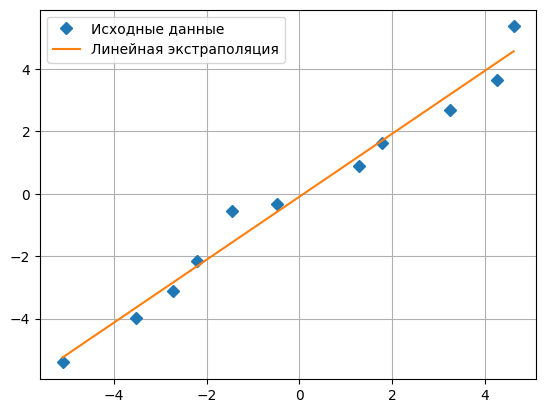

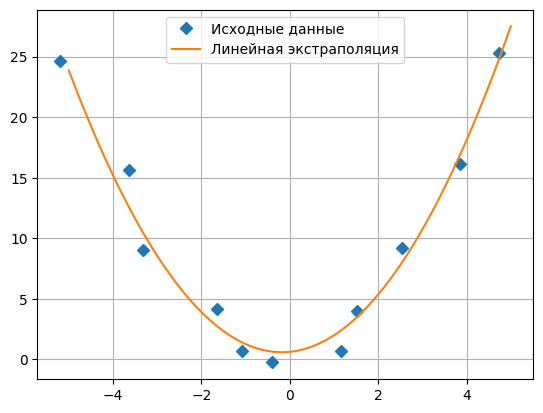

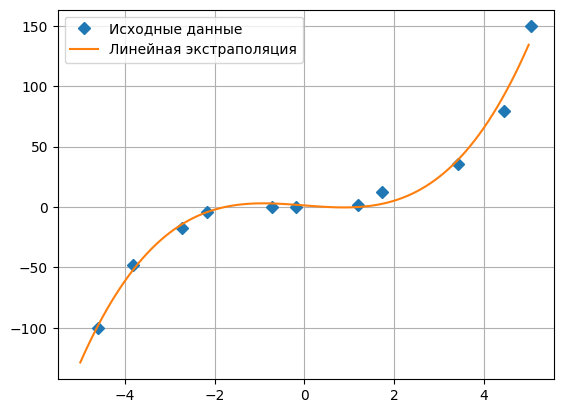

In [ ]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

delta = 1.0
x = np.linspace(-5, 5, 11)
y = x+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

a = np.vstack([x, np.ones(len(x))]).T
s = np.linalg.lstsq(a, y, rcond = None)[0]

plt.plot(x, y, 'D', label='Исходные данные')
plt.plot(x, s[0]*x + s[1], '-', label='Линейная экстраполяция')
plt.legend()
plt.grid()
plt.show()

delta = 1.0
x = np.linspace(-5, 5, 11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

m = np.vstack((x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)
plt.plot(x, y, 'D', label='Исходные данные')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', label='Линейная экстраполяция')
plt.legend()
plt.grid()
plt.show()

delta = 1.0
x = np.linspace(-5, 5, 11)
y = x**3+x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

m = np.vstack((x**3, x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)
plt.plot(x, y, 'D', label='Исходные данные')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', label='Линейная экстраполяция')
plt.legend()
plt.grid()
plt.show()

Задание 2: Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

[0.26826571 0.71451231 0.5702401 ]
0.00028063926455476
0.13269253154776978


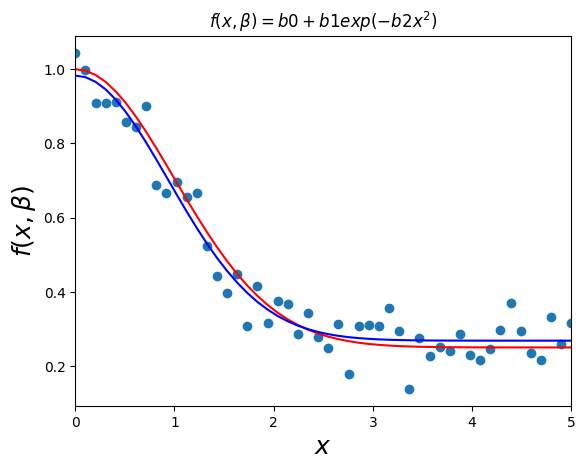

[0.25668671 0.74635015]
0.00018694133785033038
0.16437945441132013


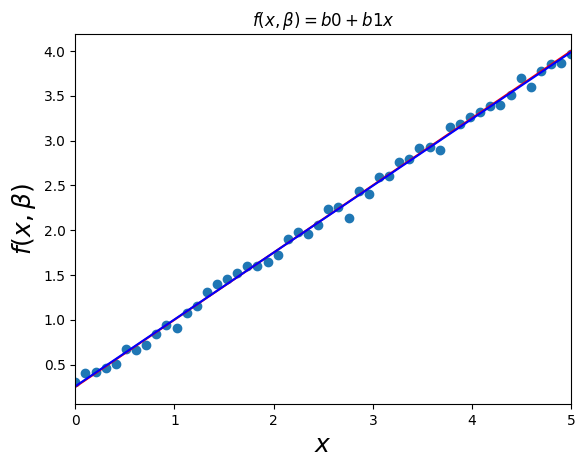

[0.2693406  0.75344435 0.49759141]
0.00012035869748924574
0.10036655772253734


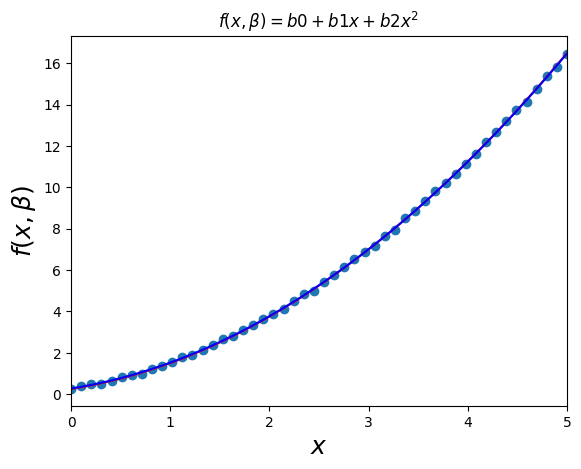

[0.99263979 2.01076777]
4.3657628137056616e-05
0.10095570183225712


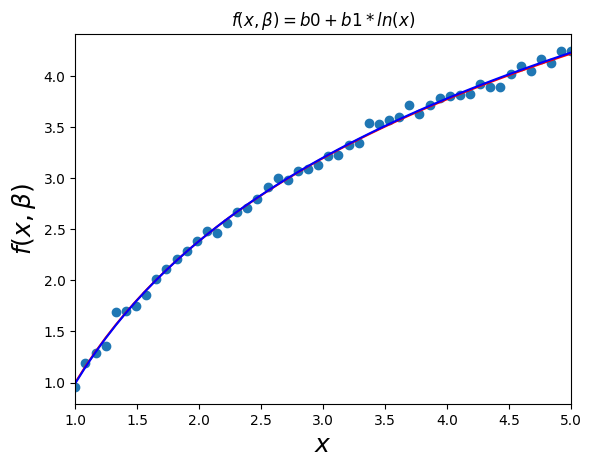

[0.98774325 2.00848302]
3.5426607484151134e-06
0.0881104055641005


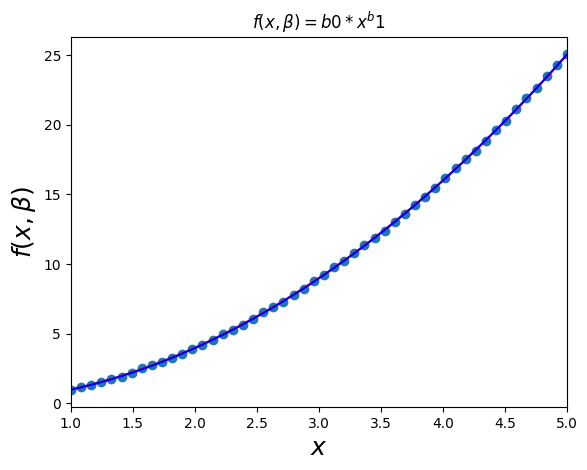

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit

#f(x, \beta) = b0 + b1exp(-b2x^2)
beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
  return b0+b1*np.exp(-b2*x**2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r')
ax.plot(xdata, f(xdata, *beta_opt), 'b')
ax.set_xlim(0, 5)
ax.set_title(r"$f(x, \beta) = b0 + b1exp(-b2x^2)$")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#f(x, \beta) = b0 + b1x
beta = (0.25, 0.75)

def f(x, b0, b1):
  return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r')
ax.plot(xdata, f(xdata, *beta_opt), 'b')
ax.set_xlim(0, 5)
ax.set_title(r"$f(x, \beta) = b0 + b1x$")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#f(x, \beta) = b0 + b1x + b2x^2
beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
  return b0+b1*x+b2*x**2

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r')
ax.plot(xdata, f(xdata, *beta_opt), 'b')
ax.set_xlim(0, 5)
ax.set_title(r"$f(x, \beta) = b0 + b1x + b2x^2$")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#f(x, \beta) = b0 + b1*ln(x)
beta = (1, 2)

def f(x, b0, b1):
  return b0+b1*np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r')
ax.plot(xdata, f(xdata, *beta_opt), 'b')
ax.set_xlim(1, 5)
ax.set_title(r"$f(x, \beta) = b0 + b1*ln(x)$")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#f(x, \beta) = b0 * x^b1
beta = (1, 2)

def f(x, b0, b1):
  return b0 * x**b1

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r')
ax.plot(xdata, f(xdata, *beta_opt), 'b')
ax.set_xlim(1, 5)
ax.set_title(r"$f(x, \beta) = b0 * x^b1$")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

Задание 3: Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз

26780.09915062818
[9312.57512673]
     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


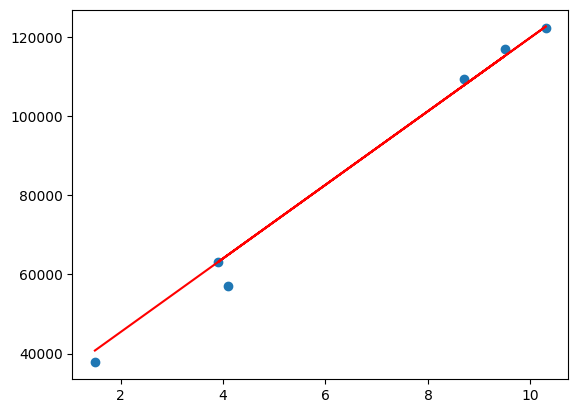

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
df = pd.read_csv(url)

X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

regressor=LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

y_pred=regressor.predict(x_test)
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(data)

plt.scatter(x_test,y_test,marker='o')
plt.plot(x_test,y_pred,'r')
plt.show()

Задание 4: Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.cs

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url="https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
df = pd.read_csv(url)

X=df[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
Y=df['Petrol_Consumption']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

regressor=LinearRegression()
regressor.fit(x_train,y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df, '\n')

y_pred=regressor.predict(x_test)
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(data)

                              Coefficient
Petrol_tax                     -40.016660
Average_income                  -0.065413
Paved_Highways                  -0.004741
Population_Driver_licence(%)  1341.862121 

    Actual   Predicted
29     534  469.391989
4      410  545.645464
26     577  589.668394
30     571  569.730413
32     577  649.774809
37     704  646.631164
34     487  511.608148
40     587  672.475177
7      467  502.074782
10     580  501.270734


Задание 5: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов

     X    Y  Полином 1ый
0  5.0  2.0     3.095238
1  5.2  4.0     3.123810
2  5.4  4.0     3.152381
3  5.6  3.0     3.180952
4  5.8  3.0     3.209524
5  6.0  3.0     3.238095


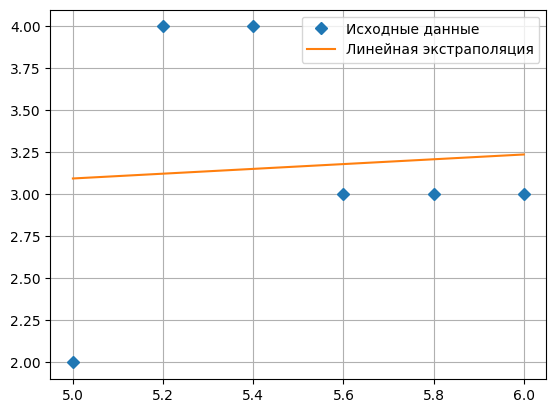

     X    Y  Полином 2ой
0  5.0  2.0     2.500000
1  5.2  4.0     3.242857
2  5.4  4.0     3.628571
3  5.6  3.0     3.657143
4  5.8  3.0     3.328571
5  6.0  3.0     2.642857


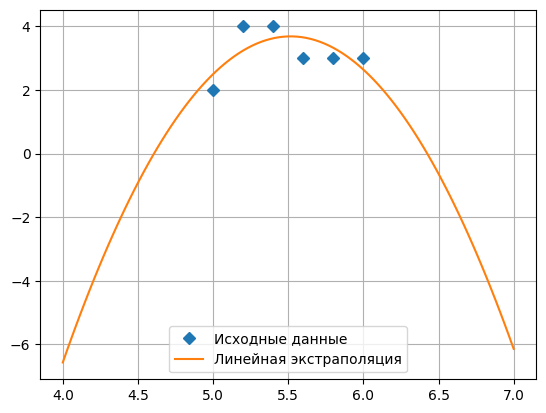

In [94]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

#Вариант 5
# x= 5,0 5,2 5,4 5,6 5,8 6,0
# y= 2,0 4,0 4,0 3,0 3,0 3,0
x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([2.0, 4.0, 4.0, 3.0, 3.0 ,3.0])

m = np.vstack([x, np.ones(len(x))]).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

df=pd.DataFrame({'X':x, 'Y':y,'Полином 1ый':s[0]*x + s[1]})
print(df)

plt.plot(x, y, 'D', label='Исходные данные')
plt.plot(x, s[0]*x + s[1], '-', label='Линейная экстраполяция')
plt.legend()
plt.grid()
plt.show()

x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([2.0, 4.0, 4.0, 3.0, 3.0 ,3.0])

m = np.vstack((x**2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

df=pd.DataFrame({'X':x, 'Y':y,'Полином 2ой':s[0] * x**2 + s[1] * x+s[2]})
print(df)

x_prec = np.linspace(4, 7, 101)
plt.plot(x, y, 'D', label='Исходные данные')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', label='Линейная экстраполяция')
plt.legend()
plt.grid()
plt.show()